# Diebetes Prediction with SVM


In [19]:
#Importing Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [20]:
data = pd.read_csv(r'D:\Visual Studio Code\ML\DataSet\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
data.shape

(768, 9)

In [22]:
#Getting Statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
data['Outcome'].value_counts()
#0 --> Non-Diabetic 
#1 --> Diabetic

Outcome
0    500
1    268
Name: count, dtype: int64

In [24]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [25]:
#Seperating data into X and Y variables and then performing train and test for spliting data 
x = data.drop(columns= 'Outcome',axis=1)
y=data['Outcome']
# scaler= StandardScaler()
# scaler.fit(x)
# x_stand =scaler.transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [26]:
#Using support vector Machine (SVM) for prediction
classifier = SVC(kernel='linear')
#Fitting the model
classifier.fit(x_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [27]:
y_pred_train = classifier.predict(x_train)
accuracy =accuracy_score(y_pred_train,y_train)
print("Accuracy of Training data : ",accuracy)

Accuracy of Training data :  0.7833876221498371


In [28]:
y_pred_test = classifier.predict(x_test)
accuracy = accuracy_score(y_pred_test,y_test)
print("Accuracy of Testing data: ",accuracy)

Accuracy of Testing data:  0.7727272727272727


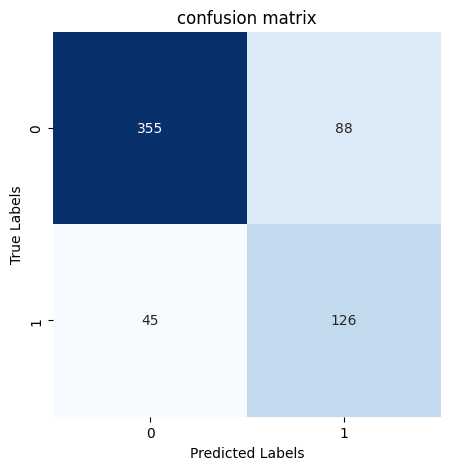

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Confusion matrix of traing data
cm = confusion_matrix(y_pred_train,y_train)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot= True,fmt ='g',cmap='Blues',cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('confusion matrix')
plt.show()

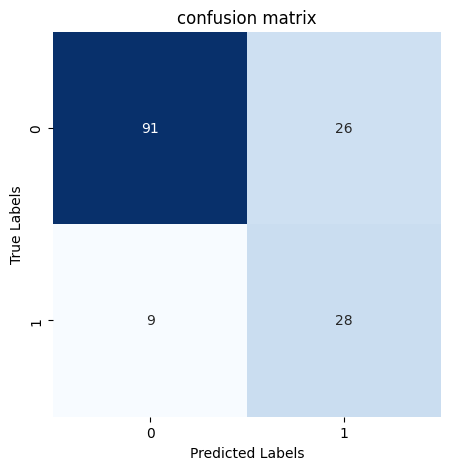

In [30]:
#Confusion matrix of testing data
cm = confusion_matrix(y_pred_test,y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot= True,fmt ='g',cmap='Blues',cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('confusion matrix')
plt.show()

Predicting Data

In [46]:
input_data =(3,158,76,36,245,31.6,0.851,28)

#Changing this data into an array
input_data = np.asarray(input_data)

#Changing its shape
input_data = input_data.reshape(1,-1)

#Standard the data
# std_data = scaler.transform(input_data)

prediction = loaded_model.predict(input_data) #If we use std_data then that will be used 

if (prediction[0] == 0):
    print("Not Diabetic")
else:
    print("Diabetic")

Diabetic


C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Saving the Model

In [47]:
import pickle
file_name = 'trained_model.sav'
pickle.dump(classifier,open(file_name,'wb'))

In [48]:
# loading the train model 
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [49]:
input_data =(3,158,76,36,245,31.6,0.851,28)

#Changing this data into an array
input_data = np.asarray(input_data)

#Changing its shape
input_data = input_data.reshape(1,-1)

#Standard the data
# std_data = scaler.transform(input_data)

prediction = loaded_model.predict(input_data) #If we use std_data then that will be used 

if (prediction[0] == 0):
    print("Not Diabetic")
else:
    print("Diabetic")

Diabetic


C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
